In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
sns.set(style="whitegrid")
import warnings

from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']= 15,15

ModuleNotFoundError: No module named 'eli5'

# Importing

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# cleansing

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
#visualization

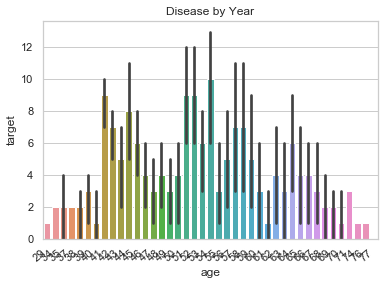

In [8]:
diByAge = sns.barplot(data = data, x = 'age', y = 'target', estimator =sum)
diByAge.set_title('Disease by Year')
diByAge.set_xticklabels(diByAge.get_xticklabels(),rotation =40, ha = "right")
plt.show()


In [9]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


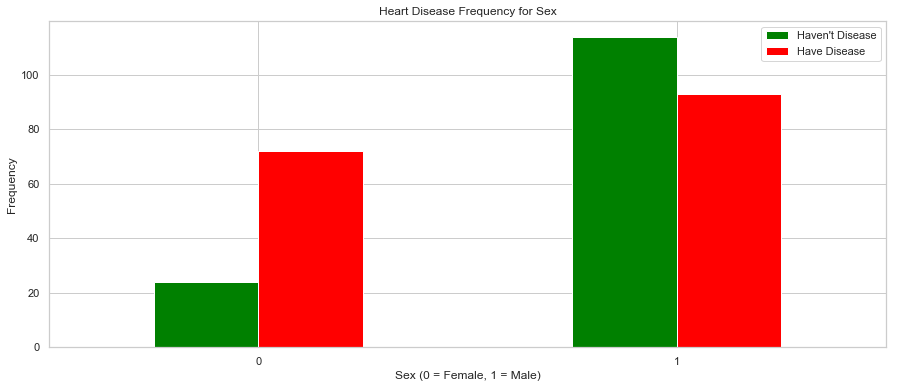

In [11]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

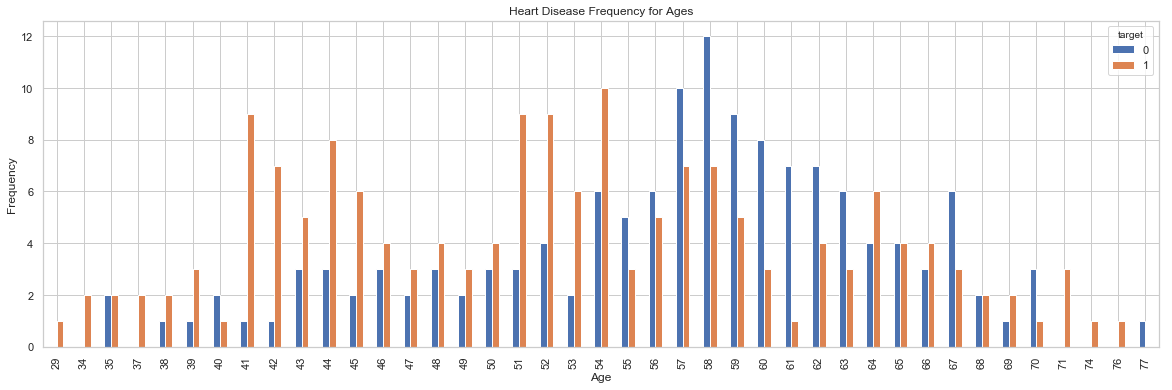

In [12]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: healthy')

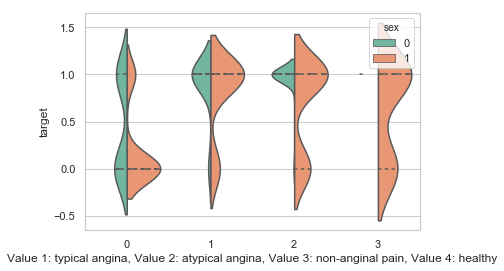

In [13]:
ax = sns.violinplot(x="chest_pain_type", y="target", hue="sex",
...                     data=data, palette="Set2", split=True,
...                     scale="count", inner="quartile")
plt.xlabel('Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: healthy')

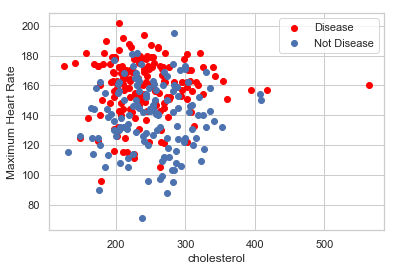

In [14]:
plt.scatter(x=data.cholesterol[data.target==1], y=data.max_heart_rate_achieved[(data.target==1)], c="red")
plt.scatter(x=data.cholesterol[data.target==0], y=data.max_heart_rate_achieved[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("cholesterol")
plt.ylabel("Maximum Heart Rate")
plt.show()

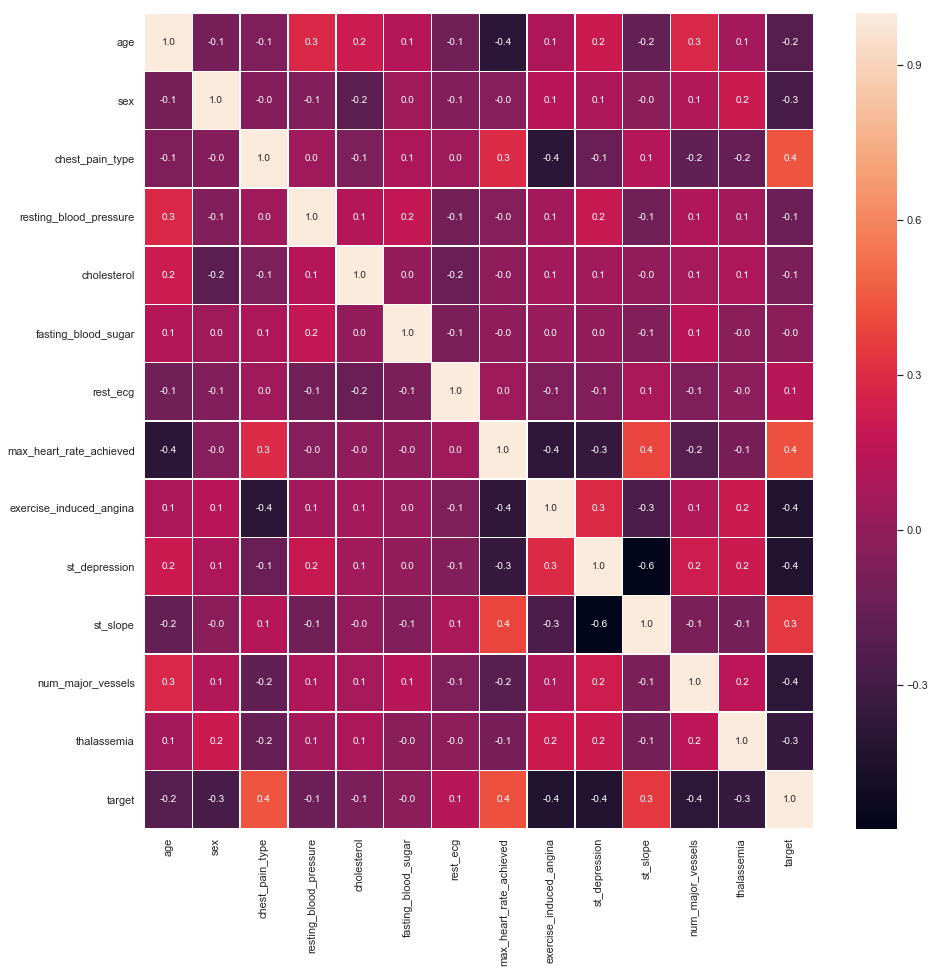

In [15]:
f,ax = plt.subplots(figsize=(15, 15))
#mask = np.zeros_like(correlation.corr())
#mask[np.triu_indices_from(maks)] = TRUE
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
#wrangling

In [16]:
a = pd.get_dummies(data['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(data['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(data['st_slope'], prefix = "st_slope")

In [17]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression     ...      chest_pain_type_1  \
0                        0            2.3     ...                      0   
1                        0            3.5     ...                      0   
2                        0            1.4     ...                      1   
3                        0            0.8     ...                      1   
4                        1            0.6     ...                      0   

   chest_pain_type_2  chest_pain_type_3  thalassemia_0  thalassemia_1  \
0                  0                  1              0              1   
1                  1                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   thalassemia_2  thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0              0           1           0           0  
1              1              0           1           0           0  
2              1              0           0           0           1  
3              1              0           0           0           1  
4              1              0           0           0           1  

[5 rows x 25 columns]

In [18]:
data = data.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
data.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   rest_ecg  max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0         0                      150                        0            2.3   
1         1                      187                        0            3.5   
2         0                      172                        0            1.4   
3         1                      178                        0            0.8   
4         1                      163                        1            0.6   

   num_major_vessels     ...      chest_pain_type_1  chest_pain_type_2  \
0                  0     ...                      0                  0   
1                  0     ...                      0                  1   
2                  0     ...                      1                  0   
3                  0     ...                      1                  0   
4                  0     ...                      0                  0   

   chest_pain_type_3  thalassemia_0  thalassemia_1  thalassemia_2  \
0                  1              0              1              0   
1                  0              0              0              1   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              0              1   

   thalassemia_3  st_slope_0  st_slope_1  st_slope_2  
0              0           1           0           0  
1              0           1           0           0  
2              0           0           0           1  
3              0           0           0           1  
4              0           0           0           1  

[5 rows x 22 columns]

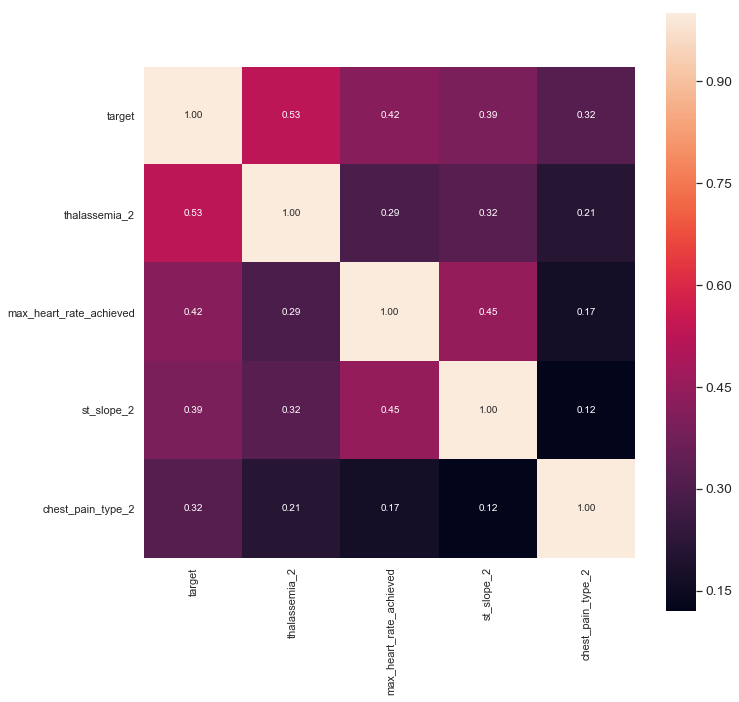

In [19]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = data.corr().nlargest(k, 'target')['target'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#machine learning-decision tree

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2, random_state=10)

In [21]:
print('Training x Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing x Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training x Shape: (242, 21)
Training y Shape: (242,)
Testing x Shape: (61, 21)
Testing y Shape: (61,)


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model = RandomForestClassifier(max_depth=5)
# Train the model on training data
model.fit(X_train, y_train);

In [23]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [24]:
# Export the image to a dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [25]:
# Use the forest's predict method on the test data
y_predict = model.predict(X_test)
print(y_predict)
y_pred_quant = model.predict_proba(X_test)[:, 1]
#print(y_pred_quant)

[0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1]


In [26]:
from sklearn.metrics import accuracy_score
# Calculate the absolute errors
errors = np.mean(y_predict != y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(errors, 2), 'degrees.')
accuracy_score(y_test,y_predict)

Mean Absolute Error: 0.2 degrees.


0.8032786885245902

In [27]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[28,  7],
       [ 5, 21]])

In [ ]:
#machine learning- logistic regression

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from matplotlib import style
from mlxtend.plotting import plot_decision_regions
sc = StandardScaler()
sc.fit(X_train)
x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)

In [29]:
lr = LogisticRegression(C= 1000, random_state = 0)
lr.fit(x_train_std, y_train)
#lr.predict(X_test[0:21])
y_pred2 = lr.predict(x_test_std)
print(y_pred2)
errors = np.mean(y_pred2 != y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(errors, 2), 'degrees.')
score2 = accuracy_score(y_test,y_pred2)
print(len(y_test),(y_test != y_pred2).sum())
score2

[0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1]
Mean Absolute Error: 0.2 degrees.
61 12


0.8032786885245902